In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import json
import seaborn as sns

In [60]:
# sns.set_style('ticks')
# sns.set_context('paper', font_scale=1.75, rc={'lines.linewidth': 2})
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.75, rc={'lines.linewidth': 2})

In [27]:
def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text

In [2]:
fn = '/home/motamedi/Dropbox/workspace/PycharmProjects/charm/WWWPerf/Timings/alexa_times.txt'
data = [json.loads(l) for l in open(fn, 'rb')]

In [3]:
df = DataFrame(data)

In [49]:
df.head()

,OK,redirect_url,remote_ip,size_download,size_header,size_request,size_upload,time_appconnect,time_connect,time_namelookup,time_pretransfer,time_redirect,time_starttransfer,time_total,url
0,1,,2607:f8b0:400a:806::2004,10451,653,78,0,0,0.012,0.004,0.012,0,0.046,0.047,google.com
1,1,,204.79.197.200,114615,1200,76,0,0,0.035,0.029,0.036,0,0.079,0.097,bing.com
2,1,,2600:1406:3:38c::1aca,33659,264,77,0,0,0.045,0.016,0.045,0,0.075,0.104,apple.com
3,1,,2607:f8b0:400a:809::2003,10949,641,81,0,0,0.134,0.127,0.134,0,0.166,0.167,google.com.br
4,1,,2607:f8b0:400a:806::2003,10682,641,81,0,0,0.132,0.124,0.132,0,0.165,0.166,google.com.mx


In [47]:
fn = '/home/motamedi/Dropbox/workspace/PycharmProjects/charm/WWWPerf/Timings/data/ips_resolved.txt'
df_ip_asn = pd.read_csv(fn, sep='|', header=-1, names=['asn', 'ip', '/24', 'co', 'agency', 'date', 'name'], converters = {'ip' : strip, '/24' : strip, 'date': strip, 'name': strip})

In [50]:
df_merge = pd.merge(df, df_ip_asn, left_on='remote_ip', right_on='ip')
df_merge.head()

,OK,redirect_url,remote_ip,size_download,size_header,size_request,size_upload,time_appconnect,time_connect,time_namelookup,...,time_starttransfer,time_total,url,asn,ip,/24,co,agency,date,name
0,1,,2607:f8b0:400a:806::2004,10451,653,78,0,0,0.012,0.004,...,0.046,0.047,google.com,15169,2607:f8b0:400a:806::2004,2607:f8b0:400a::/48,US,arin,2009-03-12,"GOOGLE - Google Inc., US"
1,1,,204.79.197.200,114615,1200,76,0,0,0.035,0.029,...,0.079,0.097,bing.com,8068,204.79.197.200,204.79.197.0/24,US,arin,,MICROSOFT-CORP-MSN-AS-BLOCK - Microsoft Corpor...
2,1,,2600:1406:3:38c::1aca,33659,264,77,0,0,0.045,0.016,...,0.075,0.104,apple.com,20940,2600:1406:3:38c::1aca,2600:1406:3::/48,US,arin,2010-04-21,"AKAMAI-ASN1 , US"
3,1,,2607:f8b0:400a:809::2003,10949,641,81,0,0,0.134,0.127,...,0.166,0.167,google.com.br,15169,2607:f8b0:400a:809::2003,2607:f8b0:400a::/48,US,arin,2009-03-12,"GOOGLE - Google Inc., US"
4,1,,2607:f8b0:400a:809::2003,10517,640,80,0,0,0.132,0.124,...,0.255,0.256,google.co.uk,15169,2607:f8b0:400a:809::2003,2607:f8b0:400a::/48,US,arin,2009-03-12,"GOOGLE - Google Inc., US"


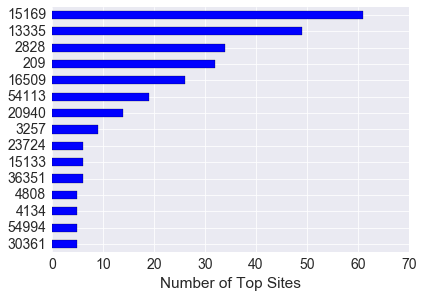

In [87]:
ax = df_merge['asn'].value_counts(ascending=True).tail(n=15).plot(kind='barh')
ax.grid('on')
ax.set_xlabel('Number of Top Sites')
fig_name = '/home/motamedi/Dropbox/Apps/ShareLaTeX/ThousandEyes/figs/asn_usage.png'
plt.savefig(fig_name, bbox_inches='tight', format='png', dpi=100)

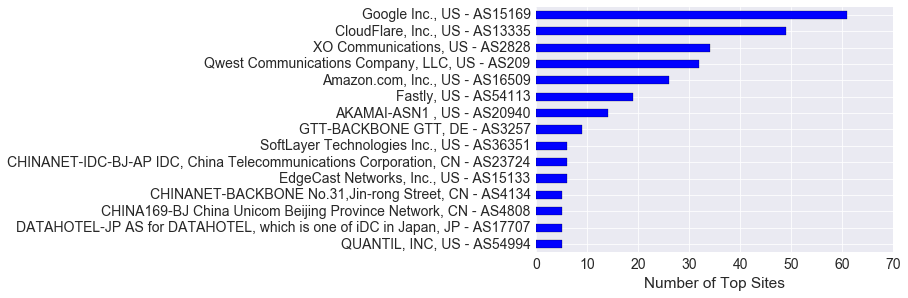

In [86]:
net_names = df_merge.apply(lambda r: '{} - AS{}'.format(r['name'].split(' - ')[-1], r['asn']), axis=1)
# net_names = df_merge.apply(lambda r: '{} - AS{}'.format(r['name'], r['asn']), axis=1)
ax = net_names.value_counts(ascending=True).tail(n=15).plot(kind='barh')
ax.grid('on')
ax.set_xlabel('Number of Top Sites')
fig_name = '/home/motamedi/Dropbox/Apps/ShareLaTeX/ThousandEyes/figs/net_usage.png'
plt.savefig(fig_name, bbox_inches='tight', format='png', dpi=320)